In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
import seaborn as sns

df = pd.read_csv('data.csv')
df.head(10)

,Id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1001,999.0,management,married,tertiary,no,2143.0,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,1002,44.0,technician,single,secondary,no,29.0,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,1003,33.0,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,1004,47.0,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,1005,33.0,unknown,single,unknown,no,1.0,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,1006,35.0,management,married,tertiary,no,231.0,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,1007,28.0,management,single,tertiary,no,447.0,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,1008,NaN,entrepreneur,divorced,tertiary,yes,NaN,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,1009,58.0,retired,married,primary,no,NaN,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,1010,43.0,technician,single,secondary,no,NaN,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [2]:
df.describe()

,Id,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45202.000000,45208.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,23606.000000,40.954714,1362.346620,15.806419,258.163080,2.763841,40.197828,0.580323
std,13051.435847,11.539144,3044.852387,8.322476,257.527812,3.098021,100.128746,2.303441
min,1001.000000,-1.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,12303.500000,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,23606.000000,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,34908.500000,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,46211.000000,999.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [3]:
df_data_out_age = df[df.age>100].index
df_data_out_age_2 = df[df.age<=0].index

df.drop(df_data_out_age, axis=0, inplace=True)
df.drop(df_data_out_age_2, axis=0, inplace=True)

In [4]:
df.age.fillna(df.age.median(), inplace=True)
df.balance.fillna(0, inplace=True)

df.drop_duplicates(inplace=True)

In [6]:
housing_dummy = {'no':0, 'yes':1} 
loan_dummy = {'no':0, 'yes':1}
education_dummy = {'secondary':2, 'tertiary':3, 'primary':1, 'unknown':0}

In [7]:
df.housing.replace(housing_dummy, inplace=True)
df.loan.replace(loan_dummy, inplace=True)
df.education.replace(education_dummy, inplace=True)
df.default.replace(loan_dummy, inplace=True)
df.y.replace(loan_dummy, inplace=True)

In [10]:
job_dummies = pd.get_dummies(df.job)
marital_dummies = pd.get_dummies(df.marital)

df = pd.concat([df, job_dummies], axis=1)
df = pd.concat([df, marital_dummies], axis=1)

df.drop(['marital','job'], axis=1, inplace=True)

<AxesSubplot:>

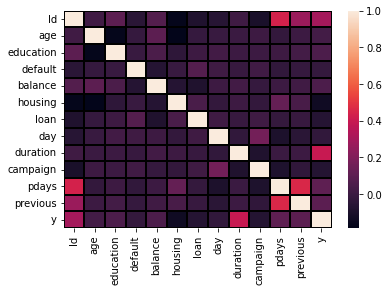

In [12]:
sns.heatmap(df.iloc[:,:16].corr(), linewidth = 2, linecolor='black')

In [13]:
model = LogisticRegression()

In [26]:
X = df[['duration', 'previous', 'pdays']]
Y = df['y']

In [27]:
test_split_index = int(X.shape[0]*0.75)
X_train = X[:test_split_index]
X_test = X[test_split_index:]
Y_train = Y[:test_split_index]
Y_test = Y[test_split_index:]

In [28]:
model.fit(X_train, Y_train)

LogisticRegression()

In [29]:
Y_predicted = model.predict(X_test)

In [30]:
Y_predicted

array([0, 0, 0, ..., 1, 0, 0])

In [31]:
accuracy_test = accuracy_score(Y_test, Y_predicted)
print(f'Accuracy: {accuracy_test:0.2f}')

Accuracy: 0.73
